In [1]:
from utils_v1 import *


In [2]:
from icecream import ic
import pdb
from sklearn import metrics
import importlib
import utils_v1
import pathlib
import cv2
import sys
import numpy as np
from src import metrics as _metrics
import src.loss as loss
from src.dataset import (
    MultipleDates,
    PA, PADeforestationTime, PADistanceMap, PAMultipleDates,
    MTDeforestationTime,
    MTMultipleDates,
    MAMultipleDates
)

# from src.dataset_legacy import MTDeforestationTime
from src import training_generator as generator
from src.patchesHandler import PatchesHandler, PatchesHandlerMultipleDates
from src.trainer.multioutput import TrainerEnsemble
from src.backend.Logger import Logger


In [3]:
from enum import Enum
UncertaintyMethod = Enum('UncertaintyMethod', 'pred_var MI pred_entropy KL pred_entropy_single')
uncertaintyMethod = "pred_entropy"
# uncertaintyMethod = "pred_var"
# uncertaintyMethod = "MI"
# uncertaintyMethod = "KL"

# uncertaintyMethod = "pred_entropy_single"


In [4]:
useLessInferenceRuns = False
reducedInferenceRuns = 30

In [5]:

config = {
	"training": False,
	"save_probabilities": False,
	"loadInference": False,
	"addPastDeforestationInput": True,
	"inference_times": 10,
	"removePolygons": True,
	"uncertainty_method": uncertaintyMethod,
	"classes_mode": True
}
print(config)

'''
if training == True:
	dates = [2017, 2018]
else:
	dates = [2018, 2019]
if training == True:
	dates = [2018, 2019]
else:
	dates = [2019, 2020]
'''


# dates = [2020, 2021]
# dataset = MAMultipleDates(dates = dates, # dates = [2017, 2018, 2019]. [2018, 2019]. [2015, 2016, 2017, 2018]
# 	addPastDeforestationInput = config['addPastDeforestationInput'],
# 	borderBuffer = 2)	
site = 'PA'
# site = 'PA'

if site == 'PA':
	dates = [2018, 2019]

	dataset = PAMultipleDates(dates = dates, # dates = [2017, 2018, 2019]. [2018, 2019]. [2015, 2016, 2017, 2018]
		addPastDeforestationInput = config['addPastDeforestationInput'],
		borderBuffer = 2)	
	# dataset.prodes_dates = [2018, 2019, 2020]

elif site == 'MT':
	dates = [2019, 2020]

	dataset = MTMultipleDates(dates = dates, # dates = [2016,2017,2018,2019]
	 	addPastDeforestationInput = config['addPastDeforestationInput'],
		borderBuffer = 2)	
	# dataset.prodes_dates = [2019, 2020, 2021]


if issubclass(type(dataset), MultipleDates):
	patchesHandler = PatchesHandlerMultipleDates(
		dataset)
else:
	patchesHandler = PatchesHandler()

inference_times = config['inference_times']


if config['training'] == False:

	if type(dataset) == PAMultipleDates:
		# exp_ids = [103, 104, 105, 106, 107, 118, 119, 120, 121, 122] # same date
		exp_ids = [123, 124, 125, 126, 127, 128, 129, 131, 1122, 1121] # earlier date

	if type(dataset) == MTMultipleDates:
		exp_ids = [108, 109, 110, 111, 112, 113, 114, 115, 116, 117] # same date
		# exp_ids = [130, 132, 133, 134, 135, 136, 137, 1125, 1124, 1123] # earlier date

else:
	# exp = 13 # Multiple dates. using fixed fixed past deforestation distance
	exp = 140

logger = Logger()
trainer = TrainerEnsemble(config, dataset, patchesHandler, logger)

trainer.defineExperiment(exp_ids)


{'training': False, 'save_probabilities': False, 'loadInference': False, 'addPastDeforestationInput': True, 'inference_times': 10, 'removePolygons': True, 'uncertainty_method': 'pred_entropy', 'classes_mode': False}


ic| list(self.date_ids): [0]
ic| self.image_channels: [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]]
ic| self.input_image_shape: 21
ic| self.dataset.image_channels: [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]]


In [6]:
exp_ids

[123, 124, 125, 126, 127, 128, 129, 131, 1122, 1121]

In [7]:
trainer.classes_mode

False

In [8]:
# trainer.setExperimentPath()
# trainer.createLogFolders()

In [9]:
# ic(type(dataset), exp, dataset.dates)


In [10]:

trainer.loadLabel()

D:/Jorge/datasets/deforestation/Para/deforestation_past_years.tif
Loaded deforestation past years


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Label where deforestation past years is actual date (2019) = 1


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/deforestation_before_2008/deforestation_before_2008_para.tif


ic| np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 215], dtype=uint8), array([124211220,  38957970], dtype=int64))
ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))
ic| label_per_date.shape: (17730, 9203, 1)


Removing bufer................
Mask label shape:  
 (17730, 9203, 1) 
 Unique values:  
 [0 1 2]


In [11]:

# Creating tile mask
trainer.createTrainValTestTiles()


Tiles size:  3546 2300
Mask size:  (17730, 9200)


In [12]:

trainer.label_mask.dtype

dtype('uint8')

In [13]:
unique, count = np.unique(trainer.label_mask, return_counts=True)
print(unique, count)

total = np.sum(count)
percentage_count = [round(x*100, 1) for x in count / total]
print(percentage_count)

[0 1 2] [100903598   1838508  60373894]
[61.9, 1.1, 37.0]


In [14]:
# pdb.set_trace()

In [15]:

trainer.getLabelCurrentDeforestation()

In [16]:

trainer.loadInputImage()

ic| image_stack.shape: (17730, 9203, 21)


Image shape:  (17730, 9203, 21)
mask:  (17730, 9200)
image stack:  (17730, 9200, 21)
ref : (17730, 9200, 1)


In [17]:

np.unique(trainer.image_stack[...,0], return_counts=True)

(array([0.        , 0.08333334, 0.16666667, 0.25      , 0.33333334,
        0.4166667 , 0.5       , 0.5833334 , 0.6666667 , 0.75      ,
        0.8333334 , 0.9166667 , 1.        ], dtype=float32),
 array([104050616,   2209014,    644713,    968315,   1458862,   1560879,
          2477424,   1299508,    903419,    864429,   4570932,   3150455,
         38957434], dtype=int64))

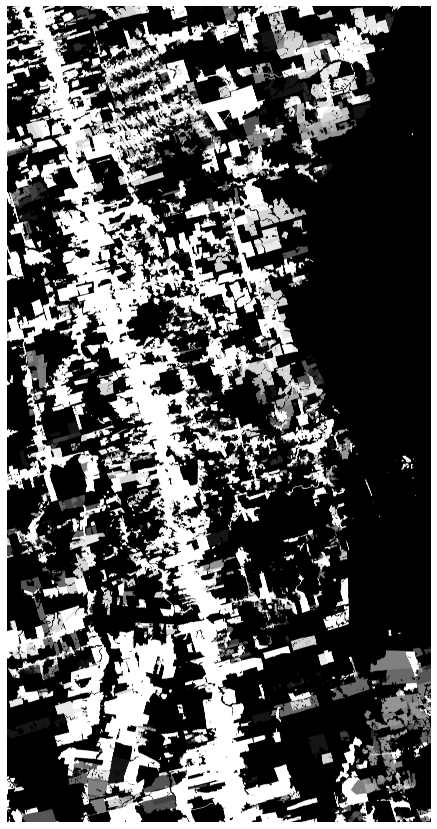

In [18]:

trainer.logger.plotFigure(trainer.image_stack[...,0], 
    name='image_stack_first_channel', cmap=plt.cm.gray, savefig=False)

In [19]:

trainer.getImageChannels()

ic| self.image_stack.shape: (17730, 9200, 21)
ic| self.channels: 21


In [20]:

trainer.getTrainValTestMasks()

Training tiles:  [1, 3, 5, 8, 11, 13, 14, 20]
Validation tiles:  [6, 19]
Test tiles:  [2, 4, 7, 9, 10, 12, 15, 16, 17, 18]


In [21]:

if config["training"] == True:
    # Extracting patches from the idx matrix
    trainer.createIdxImage()


In [22]:
if config["training"] == True:
    trainer.extractCoords()

In [23]:
if config["training"] == True:
    trainer.trainTestSplit()

In [24]:
if config["training"] == True:
    trainer.label_mask.shape

In [25]:
if config["training"] == True:
    if type(dataset) != PADeforestationTime and type(dataset) != MTDeforestationTime:
        trainer.logger.plotFigure(trainer.label_mask[...,-1], 
            name='Reference', cmap=plt.cm.gray, savefig=False)

    else:
        trainer.logger.plotFigure(trainer.label_mask[...,-1], 
            name='Reference', cmap=plt.cm.gray, savefig=False)



In [26]:
if config["training"] == True:
    np.unique(trainer.label_mask)

In [27]:
if config["training"] == True:
    print(trainer.coords_train)

In [28]:
if config["training"] == True:
    trainer.retrieveSamplesOfInterest()

In [29]:
if config["training"] == True:
    inputSnipShow = True

In [30]:
# count, unique = np.unique(label_mask, return_counts=True)
# print(count, unique)
# print(unique[1]/unique[0])

In [31]:
'''
count, unique = np.unique(label_mask[mask_amazon_ts == 1], return_counts=True)
print(count, unique)
print(unique[1]/unique[0])
'''

'\ncount, unique = np.unique(label_mask[mask_amazon_ts == 1], return_counts=True)\nprint(count, unique)\nprint(unique[1]/unique[0])\n'

In [32]:
'''
count, unique = np.unique(label_mask[mask_tr_val == 1], return_counts=True)
print(count, unique)
print(unique[1]/unique[0])
'''

'\ncount, unique = np.unique(label_mask[mask_tr_val == 1], return_counts=True)\nprint(count, unique)\nprint(unique[1]/unique[0])\n'

In [33]:
if config["training"] == True:
    if inputSnipShow == True:
        trainer.snipDataset(idx = 2800)


In [34]:
if config["training"] == True:
    if inputSnipShow == True:
        trainer.snipDataset(idx = 97)


In [35]:
if config["training"] == True:
    if inputSnipShow == True:

        trainer.snipDataset(idx = 1200)

In [36]:
if config["training"] == True:
    if inputSnipShow == True:

        trainer.snipDataset(idx = 400)

In [37]:
if config["training"] == True:
    trainer.getGenerators()


In [38]:
if config["training"] == True:
    trainer.fixChannelNumber()

In [39]:
if config["training"] == True:
    print(trainer.path_exp)

In [40]:
if config["training"] == True:
    print(trainer.channels)

In [41]:
if config["training"] == True:
    print(trainer.image_stack.shape)

In [42]:
if config["training"] == True:
    trainer.train()

In [43]:
if config["training"] == True:
    trainer.plotHistory()


In [44]:
trainer.image_stack.shape

(17730, 9200, 21)

In [45]:
if type(trainer.dataset) != PADeforestationTime and type(trainer.dataset) != MTDeforestationTime:
    trainer.patchesHandler.dataset.image_channels[-1]

In [46]:
if issubclass(type(dataset), MultipleDates):
	trainer.channels = trainer.patchesHandler.input_image_shape
	trainer.image_stack = trainer.image_stack[..., trainer.patchesHandler.dataset.image_channels[-1]]
	trainer.label_mask = trainer.label_mask[...,-1]


In [47]:
trainer.image_stack.shape

(17730, 9200, 21)

In [48]:
trainer.setPadding()

-30.0 -16.0


In [49]:
trainer.infer()

time:  0
time:  1
time:  2
time:  3
time:  4
time:  5
time:  6
time:  7
time:  8
time:  9


In [50]:
trainer.loadPredictedProbabilities()

In [51]:
trainer.prob_rec.shape

(17760, 9216, 10)

In [52]:
'''
if useLessInferenceRuns == True:
    ic(reducedInferenceRuns)

    prob_rec_all = prob_rec.copy()
    prob_rec = prob_rec_all[:reducedInferenceRuns]
    prob_rec = np.transpose(np.squeeze(prob_rec), (1, 2, 0))
'''

'\nif useLessInferenceRuns == True:\n    ic(reducedInferenceRuns)\n\n    prob_rec_all = prob_rec.copy()\n    prob_rec = prob_rec_all[:reducedInferenceRuns]\n    prob_rec = np.transpose(np.squeeze(prob_rec), (1, 2, 0))\n'

In [53]:
trainer.prob_rec.shape

(17760, 9216, 10)

In [54]:
trainer.getMeanProb()


In [55]:
trainer.logger.getStats(trainer.mean_prob)

ic| np.min(value): 1.4644367e-15
    np.mean(value): 0.012334157
    np.max(value): 0.9999992


In [56]:
ic(trainer.mean_prob.shape)

ic| trainer.mean_prob.shape: (17760, 9216)


(17760, 9216)

In [57]:
trainer.unpadMeanProb()

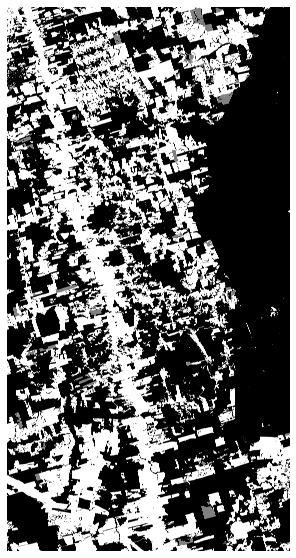

In [58]:
trainer.logger.plotFigure(trainer.label_mask, 
            name='Reference mask', figsize=(10,10), cmap=plt.cm.gray, savefig=True)

In [59]:
trainer.squeezeLabel()

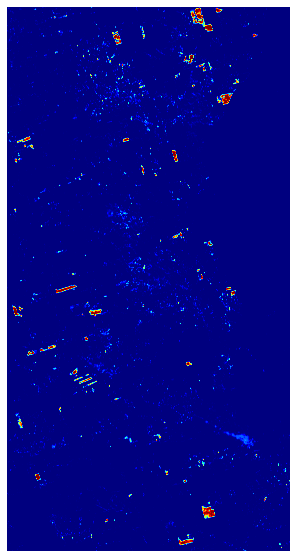

In [60]:
trainer.setMeanProbNotConsideredAreas()
trainer.logger.plotFigure(trainer.mean_prob, 
            name='Mean predicted probability', figsize=(10,10), cmap='jet', savefig=False)

In [61]:
print(trainer.label_mask.shape)

(17730, 9200)


In [62]:
trainer.getLabelTest()

(54236371,)
(array([0, 1], dtype=uint8), array([53470765,   765606], dtype=int64))


In [63]:
# trainer.getMAP()

In [64]:
trainer.prob_rec.shape

(17760, 9216, 10)

In [65]:
trainer.preprocessProbRec()
print(trainer.prob_rec.shape)

(10, 17760, 9216, 1)


In [66]:
trainer.prob_rec.shape

(10, 17760, 9216, 1)

In [67]:
trainer.logger.getStats(trainer.prob_rec)

ic| np.min(value): 0.0
    np.mean(value): 0.012330051
    np.max(value): 1.0


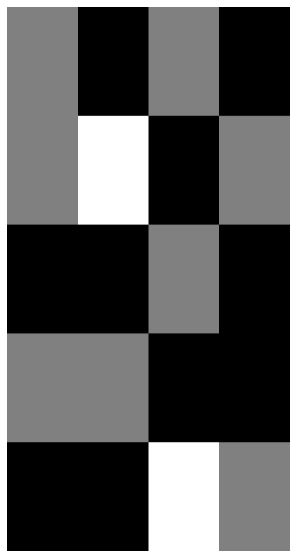

In [68]:
trainer.logger.plotFigure(trainer.mask_tr_val, 
            name=trainer.dataset.site + trainer.title_name + ' Train val mask.png', figsize=(10,10), savefig=False)

In [69]:
trainer.getLabelCurrentDeforestation()

In [70]:
trainer.applyProbabilityThreshold()

(17730, 9200)
(array([0., 1.], dtype=float32), array([161675361,   1440639], dtype=int64))


ic| self.predicted_unpad.shape: (17730, 9200)
    self.predicted.shape: (17730, 9200)


In [71]:
trainer.getTestValues()

ic| predicted_test.shape: (81558000,)
ic| predicted_test.shape: (54236371,)


In [72]:
trainer.removeSmallPolygons()

ic| np.unique(predicted, return_counts=True): (array([0., 1.], dtype=float32), array([161675361,   1440639], dtype=int64))
    np.unique(predicted_larger_than_min_area, return_counts=True): (array([0., 1.], dtype=float32), array([161789622,   1326378], dtype=int64))
ic| np.unique(ignored_polygons, return_counts=True): (array([0., 1.], dtype=float32), array([163001739,    114261], dtype=int64))


In [73]:
trainer.calculateMetrics()

ic| self.f1: 81.41, self.precision: 97.07, self.recall: 70.1


In [74]:
trainer.getValidationValuesForMetrics()
trainer.calculateMetricsValidation()

ic| self.label_mask_val.shape: (16311600,)
ic| self.label_mask_val_valid.shape: (9439113,)
ic| f1_val: 82.77
    precision_val: 89.56
    recall_val: 76.94
    mAP_val: 85.73


In [75]:
calculateMAPWithoutSmallPolygons = False
if calculateMAPWithoutSmallPolygons == True:
    trainer.calculateMAPWithoutSmallPolygons()

In [76]:
trainer.get_label_no_buffer()


D:/Jorge/datasets/deforestation/Para/deforestation_past_years.tif
Loaded deforestation past years


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Label where deforestation past years is actual date (2019) = 1


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/deforestation_before_2008/deforestation_before_2008_para.tif


ic| np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 215], dtype=uint8), array([124211220,  38957970], dtype=int64))
ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))
ic| label_per_date.shape: (17730, 9203, 1)


In [77]:
trainer.getErrorMask()

(array([0., 1.], dtype=float32), array([162427946,    688054], dtype=int64))


In [78]:
trainer.getErrorMaskToShowRGB()

[0. 1.]


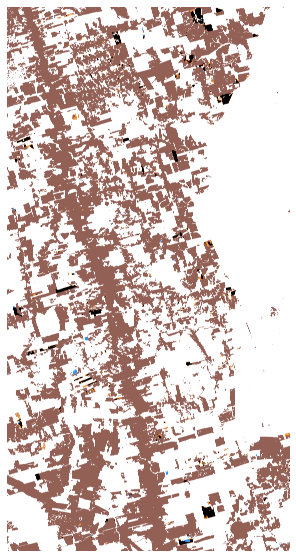

In [79]:
trainer.logger.plotFigure(trainer.error_mask_to_show_rgb[...,::-1], 
            name=trainer.dataset.site + trainer.title_name + ' error mask color.png', 
            figsize=(10,10), savefig=True, dpi=300)

In [80]:
'''
import types

trainer.setUncertainty = types.MethodType(setUncertainty, trainer)
'''


'\nimport types\n\ntrainer.setUncertainty = types.MethodType(setUncertainty, trainer)\n'

In [81]:
trainer.prob_rec.shape

(10, 17760, 9216, 1)

In [137]:
epsilon = 1e-15

def get_mean(pred_probs):
      return np.mean(pred_probs, axis=0)
    
def predictive_entropy(pred_probs, classes_mode = False):
    pred_mean = get_mean(pred_probs) # shape (patch_len, patch_len, class_n)
    pred_entropy = np.zeros((pred_mean.shape[0:2]))

    K = pred_mean.shape[-1]
    print("K shape {}, pred_mean shape {}".format(K, pred_mean.shape))
    for k in range(K):
        pred_entropy = pred_entropy + pred_mean[..., k] * np.log(pred_mean[..., k] + epsilon) 
    if classes_mode == True:
        pred_entropy = - pred_entropy / np.log(2)

    else:
        # pred_entropy = - pred_entropy / K
        pred_entropy = - pred_entropy * 2 / np.log(2)
    
    return pred_entropy


def setUncertainty(self):


    if self.config['uncertainty_method'] == "pred_entropy":
        self.uncertainty_map = predictive_entropy(self.prob_rec, self.classes_mode).astype(np.float32)


In [138]:

import types

trainer.setUncertainty = types.MethodType(setUncertainty, trainer)


In [139]:
trainer.setUncertainty()

K shape 1, pred_mean shape (17760, 9216, 1)


In [140]:
trainer.uncertainty_map.shape

(17760, 9216)

In [141]:
trainer.logger.getStats(trainer.uncertainty_map)

ic| np.min(value): 1.421314e-13
    np.mean(value): 0.03165315
    np.max(value): 1.0614758


In [142]:
trainer.getUncertaintyToShow()
trainer.logger.getStats(trainer.uncertainty_to_show)


ic| np.min(value): 0.0
    np.mean(value): 0.02768485
    np.max(value): 1.0614758


In [143]:
trainer.logger.getStats(trainer.uncertainty_to_show)


ic| np.min(value): 0.0
    np.mean(value): 0.02768485
    np.max(value): 1.0614758


ic| trainer.uncertainty_to_show.shape: (17730, 9200)


(17730, 9200)

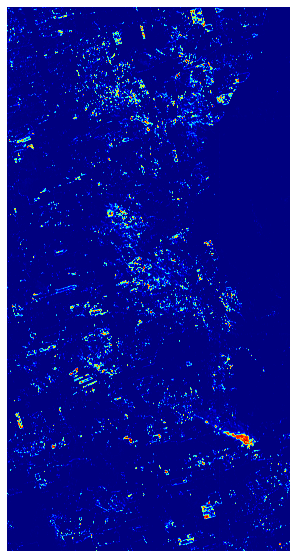

In [144]:

trainer.logger.plotFigure(trainer.uncertainty_to_show, 
            name=trainer.dataset.site + trainer.title_name + ' uncertainty '+trainer.config['uncertainty_method']+'.png', figsize=(10,10), cmap='jet', savefig=True)

ic(trainer.uncertainty_to_show.shape)



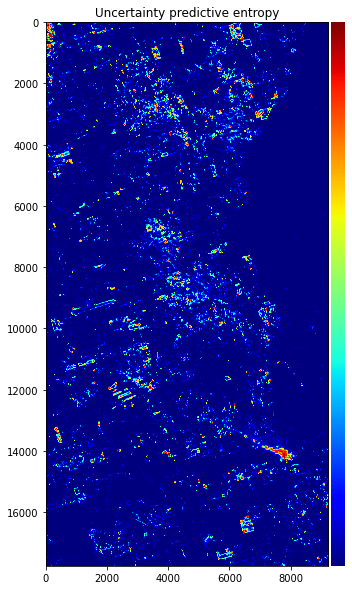

In [145]:

import src.uncertainty
fig, ax = plt.subplots(1,1,figsize=(10,10))
src.uncertainty.show_im(trainer.uncertainty_map, ax, title = 'Uncertainty predictive entropy')
plt.axis('off')
plt.savefig('output/figures/Para' + trainer.title_name + ' uncertainty '+trainer.config['uncertainty_method']+'.png', 
    dpi=150, bbox_inches='tight')

In [146]:
trainer.getValidationValues2()
trainer.getTestValues2()

ic| self.label_mask.shape: (17730, 9200)
ic| self.mask_amazon_ts.shape: (17730, 9200)
ic| self.label_mask_test.shape: (81558000,)
ic| self.error_mask_test.shape: (54181542,)


ic| trainer.dataset.previewLims1: array([2200, 3200, 6900, 7900])
    trainer.dataset.previewLims2: array([ 500, 1500, 3500, 4500])
ic| np.unique(trainer.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]]): array([1], dtype=uint8)
ic| np.unique(trainer.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]], return_counts=True): (array([1], dtype=uint8), array([1000000], dtype=int64))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


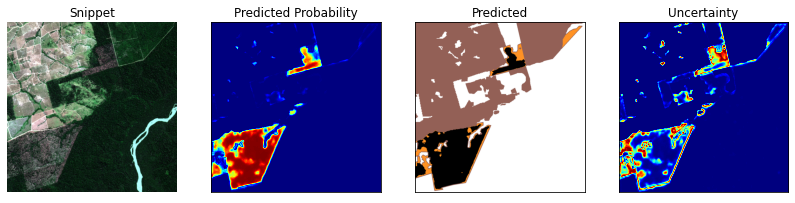

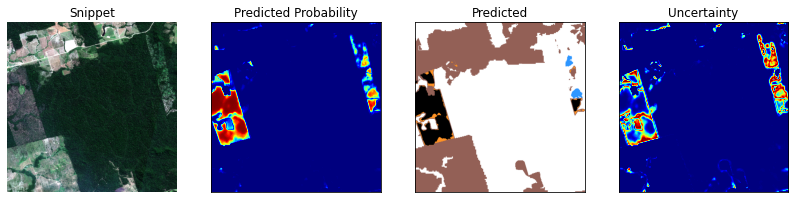

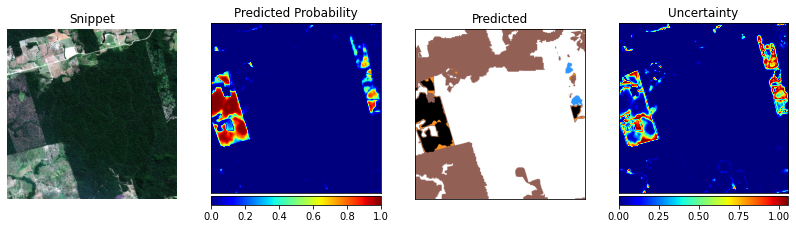

In [147]:
trainer.logger.plotCropSample(trainer)

In [148]:
trainer.logger.getStats(trainer.uncertainty)

ic| np.min(value): 5.840509e-08
    np.mean(value): 0.03746611
    np.max(value): 1.0614758


In [149]:

label_tmp_dates = []
for date in dataset.prodes_dates:
    label_tmp_date = dataset.loadLabelFromDate(date)
    label_tmp_date = label_tmp_date[:trainer.mask_tiles.shape[0], :trainer.mask_tiles.shape[1]]
    label_tmp_dates.append(label_tmp_date)

D:/Jorge/datasets/deforestation/Para/deforestation_past_years.tif
Loaded deforestation past years


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Label where deforestation past years is actual date (2018) = 1


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/deforestation_before_2008/deforestation_before_2008_para.tif


ic| np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 215], dtype=uint8), array([124211220,  38957970], dtype=int64))
ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


D:/Jorge/datasets/deforestation/Para/deforestation_past_years.tif
Loaded deforestation past years


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Label where deforestation past years is actual date (2019) = 1


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/deforestation_before_2008/deforestation_before_2008_para.tif


ic| np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 215], dtype=uint8), array([124211220,  38957970], dtype=int64))
ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


D:/Jorge/datasets/deforestation/Para/deforestation_past_years.tif
Loaded deforestation past years


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Label where deforestation past years is actual date (2020) = 1


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation different from 0 (no deforestation)


ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


Past deforestation before 2008 is 2
D:/Jorge/datasets/deforestation/deforestation_before_2008/deforestation_before_2008_para.tif


ic| np.unique(label_past_deforestation_before_2008, return_counts=True): (array([  0, 215], dtype=uint8), array([124211220,  38957970], dtype=int64))
ic| np.unique(deforestation_past_years, return_counts=True): (array([   0, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
                                                                    2018, 2019, 2020, 2021], dtype=uint16),
                                                              array([132185553,   3150503,   4571354,    864429,    903608,   1299506,
                                                                      2477971,   1561686,   1459696,    969060,    644976,   2209014,
                                                                      2100204,   5257014,   3514616], dtype=int64))


In [150]:
np.unique(label_tmp_dates[0], return_counts=True)

(array([0, 1, 2], dtype=uint8),
 array([104050616,   2209014,  56856370], dtype=int64))

In [151]:
label_tmp_dates[0].shape

(17730, 9200)

In [152]:
# del trainer.image_stack
import src.lansdatLoader as ll
import importlib
importlib.reload(ll)
landsatLoader = ll.LandsatLoader(dataset)
ims = landsatLoader.load()
for idx in range(len(ims)):
    ims[idx] = ims[idx][:trainer.mask_tiles.shape[0], :trainer.mask_tiles.shape[1],:]
ims = landsatLoader.darken_past_deforestation(ims, trainer.label_no_buffer)
ims = landsatLoader.add_deforestation_edges_by_date(ims, label_tmp_dates[:])

Loading D:/Jorge/datasets/landsat/PA/landsat_PA_2018.tif
D:/Jorge/datasets/landsat/PA/landsat_PA_2018.tif
Loading D:/Jorge/datasets/landsat/PA/landsat_PA_2019.tif
D:/Jorge/datasets/landsat/PA/landsat_PA_2019.tif
Loading D:/Jorge/datasets/landsat/PA/landsat_PA_2020.tif
D:/Jorge/datasets/landsat/PA/landsat_PA_2020.tif


In [153]:
np.unique(label_tmp_dates[0], return_counts=True)

(array([0, 1], dtype=uint8), array([160906986,   2209014], dtype=int64))

In [154]:
ims[0].shape

(17730, 9200, 3)

In [155]:
trainer.classes_mode

False

In [156]:
'''
fig, axes = plt.subplots(2, 3)
axes = axes.flatten()
fig.set_figheight(20)
fig.set_figwidth(20)
lims = trainer.dataset.previewLims1
axes[0].imshow(ims[0][lims[0]:lims[1], lims[2]:lims[3]], cmap=plt.cm.gray)
'''

'\nfig, axes = plt.subplots(2, 3)\naxes = axes.flatten()\nfig.set_figheight(20)\nfig.set_figwidth(20)\nlims = trainer.dataset.previewLims1\naxes[0].imshow(ims[0][lims[0]:lims[1], lims[2]:lims[3]], cmap=plt.cm.gray)\n'

In [157]:
# trainer.dataset.previewLims2 = np.array([5000, 6000, 9500, 10500])

In [158]:
import src.backend.Logger as lg 
importlib.reload(lg)
logger = lg.Logger()


ic| trainer.dataset.previewLims1: array([2200, 3200, 6900, 7900])
    trainer.dataset.previewLims2: array([ 500, 1500, 3500, 4500])
ic| np.unique(trainer.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]]): array([1], dtype=uint8)
ic| np.unique(trainer.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]], return_counts=True): (array([1], dtype=uint8), array([1000000], dtype=int64))


[(17730, 9200, 3), (17730, 9200, 3), (17730, 9200, 3), (17730, 9200), (17730, 9200, 3), (17730, 9200)]
(1000, 1000, 3)
(1000, 1000, 3)
(1000, 1000, 3)


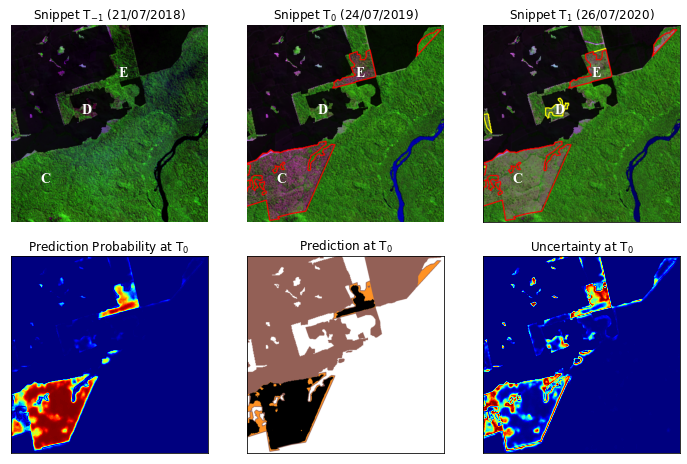

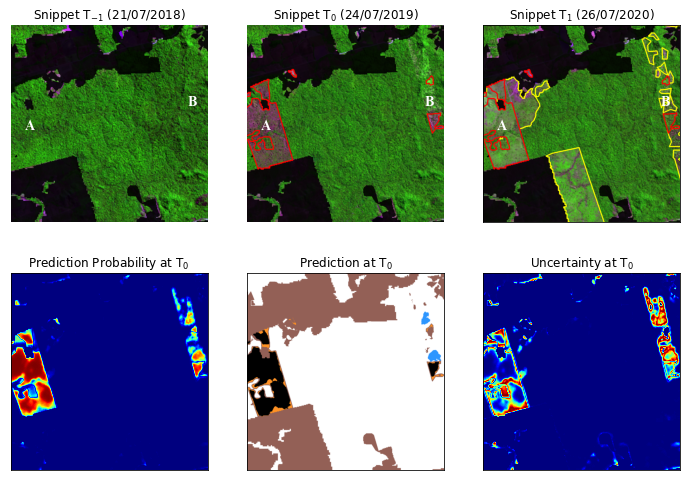

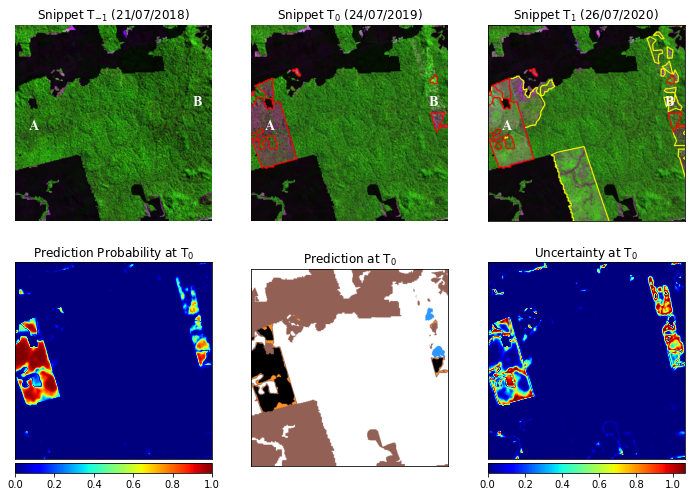

In [159]:
logger.plotCropSampleLandsat(trainer, ims)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


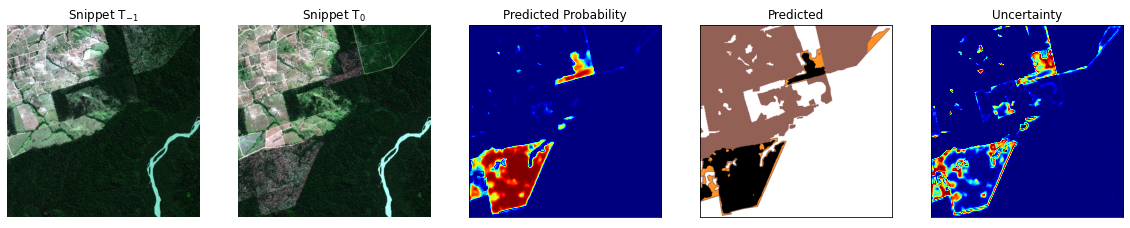

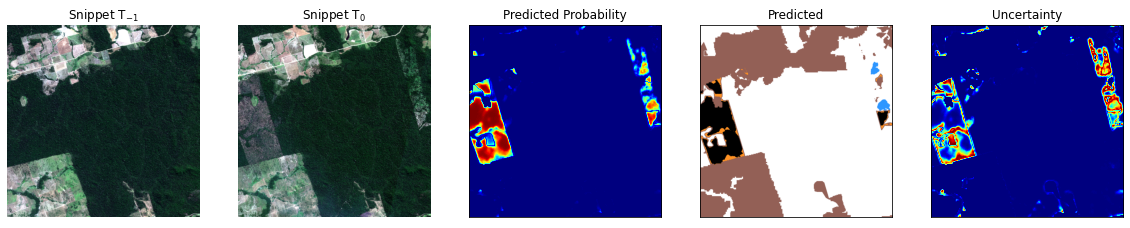

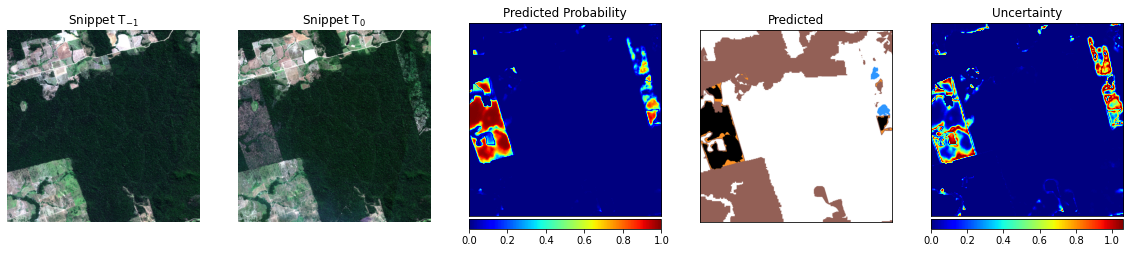

In [160]:
logger.plotCropSampleT0T1(trainer)

In [161]:
'''
dataset.previewLims1 = np.array([200, 700, 10200, 11200])
dataset.previewLims2 = np.array([2500, 3500, 6000, 7000])
'''

'\ndataset.previewLims1 = np.array([200, 700, 10200, 11200])\ndataset.previewLims2 = np.array([2500, 3500, 6000, 7000])\n'

In [162]:
'''
import importlib
importlib.reload(_plt)
plotCropSampleFlag = True
if plotCropSampleFlag == True:
        importlib.reload(_metrics)
        importlib.reload(_plt)
        # import matplotlib
        # customCmap = matplotlib.colors.ListedColormap(['black', 'red'])
        ic(dataset.previewLims1, dataset.previewLims2)
        lims = dataset.previewLims1
        ic(np.unique(mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]]))
        lims = dataset.previewLims2
        ic(np.unique(mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]], return_counts=True))

        _plt.plotCropSample5(image_stack[...,previewBandsT0], image_stack[...,previewBandsT1], mean_prob, 
                error_mask_to_show_rgb[...,::-1], pred_entropy_to_show, 
                lims = dataset.previewLims1, 
                titles = ['Snippet $\mathregular{T_{-1}}$', 'Snippet $\mathregular{T_0}$', 'Predicted Probability', 'Predicted', 'Uncertainty'],
                cmaps = [plt.cm.gray, plt.cm.gray, 'jet', plt.cm.gray, 'jet'],
                maskBackground = [False, False, True, False, True],
                invertMask = [False, False, False, False, False], uncertainty_vlims = uncertainty_vlims)
        plt.savefig('output/figures/' + dataset.__class__.__name__ + 'PredictSampleUncertainty1_.png', dpi=150, bbox_inches='tight')

        _plt.plotCropSample5(image_stack[...,previewBandsT0], image_stack[...,previewBandsT1], mean_prob, 
                error_mask_to_show_rgb[...,::-1], pred_entropy_to_show, 
                lims = dataset.previewLims2, 
                titles = ['Snippet $\mathregular{T_{-1}}$', 'Snippet $\mathregular{T_0}$', 'Predicted Probability', 'Predicted', 'Uncertainty'],
                cmaps = [plt.cm.gray, plt.cm.gray, 'jet', plt.cm.gray, 'jet'],
                maskBackground = [False, False, True, False, True],
                invertMask = [False, False, False, False, False], uncertainty_vlims = uncertainty_vlims)
        plt.savefig('output/figures/' + dataset.__class__.__name__ + 'PredictSampleUncertainty2_.png', dpi=150, bbox_inches='tight')

        _plt.plotCropSample5(image_stack[...,previewBandsT0], image_stack[...,previewBandsT1], mean_prob, 
                error_mask_to_show_rgb[...,::-1], pred_entropy_to_show, 
                lims = dataset.previewLims2, 
                titles = ['Snippet $\mathregular{T_{-1}}$', 'Snippet $\mathregular{T_0}$', 'Predicted Probability', 'Predicted', 'Uncertainty'],
                cmaps = [plt.cm.gray, plt.cm.gray, 'jet', plt.cm.gray, 'jet'],
                maskBackground = [False, False, True, False, True],
                invertMask = [False, False, False, False, False], uncertainty_vlims = uncertainty_vlims,
                colorbar = True)
        plt.savefig('output/figures/' + dataset.__class__.__name__ + 'PredictSampleUncertaintyColorbar_.png', dpi=150, bbox_inches='tight')
'''

"\nimport importlib\nimportlib.reload(_plt)\nplotCropSampleFlag = True\nif plotCropSampleFlag == True:\n        importlib.reload(_metrics)\n        importlib.reload(_plt)\n        # import matplotlib\n        # customCmap = matplotlib.colors.ListedColormap(['black', 'red'])\n        ic(dataset.previewLims1, dataset.previewLims2)\n        lims = dataset.previewLims1\n        ic(np.unique(mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]]))\n        lims = dataset.previewLims2\n        ic(np.unique(mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]], return_counts=True))\n\n        _plt.plotCropSample5(image_stack[...,previewBandsT0], image_stack[...,previewBandsT1], mean_prob, \n                error_mask_to_show_rgb[...,::-1], pred_entropy_to_show, \n                lims = dataset.previewLims1, \n                titles = ['Snippet $\\mathregular{T_{-1}}$', 'Snippet $\\mathregular{T_0}$', 'Predicted Probability', 'Predicted', 'Uncertainty'],\n                cmaps = [plt.cm.gray, plt.cm.gray

In [163]:
trainer.logger.getStats(trainer.uncertainty)


ic| np.min(value): 5.840509e-08
    np.mean(value): 0.03746611
    np.max(value): 1.0614758


In [164]:
'''
trainer.getOtherUncertaintyMetrics()
print(trainer.sUEO)

print(trainer.ece_score)  
'''

'\ntrainer.getOtherUncertaintyMetrics()\nprint(trainer.sUEO)\n\nprint(trainer.ece_score)  \n'

In [165]:
trainer.uncertainty.shape

(54181542,)

In [166]:
np.mean(trainer.mean_prob)

0.011519022

In [167]:
trainer.prob_rec.shape

(10, 17760, 9216, 1)

(17730, 9200)
[[550, 115], [430, 950]]


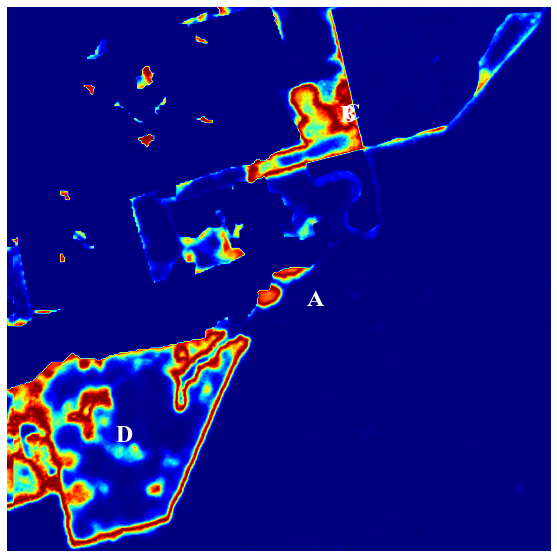

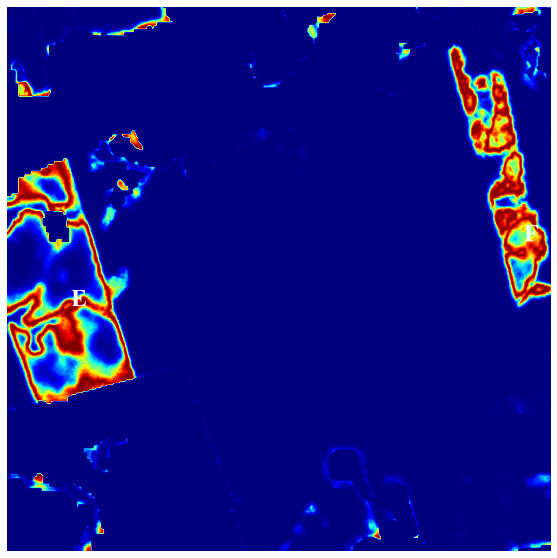

In [168]:
print(trainer.mean_prob.shape)
font = {'family': "Times New Roman",
        'color':  'white',
        'weight': 'bold',
        'size': 24,
        }

lims = dataset.previewLims1
im = trainer.uncertainty_map[lims[0]:lims[1], lims[2]:lims[3]]
plt.figure(figsize=(10,10))
plt.imshow(im, cmap='jet')

letters = ['A', 'B', 'C', 'D', 'E', 'F']

for poi_id in range(4):
        
        plt.text(trainer.dataset.snippet_coords['snippet_id0'][poi_id][1], 
                 trainer.dataset.snippet_coords['snippet_id0'][poi_id][0], 
                 letters[poi_id], fontdict=font)
plt.axis('off')

plt.savefig(os.path.join('pdf_plot_results', 
                         'pdf_plot_poi0.png'), 
    dpi=150, bbox_inches='tight')

lims = dataset.previewLims2
im = trainer.uncertainty_map[lims[0]:lims[1], lims[2]:lims[3]]
plt.figure(figsize=(10,10))
plt.imshow(im, cmap='jet')

letters = ['E', 'F']

print(trainer.dataset.snippet_coords['snippet_id1'])
for poi_id in range(2):
        
        plt.text(trainer.dataset.snippet_coords['snippet_id1'][poi_id][1], 
                 trainer.dataset.snippet_coords['snippet_id1'][poi_id][0], 
                 letters[poi_id], fontdict=font)
plt.axis('off')
        
plt.savefig(os.path.join('pdf_plot_results', 
                         'pdf_plot_poi1.png'), 
    dpi=150, bbox_inches='tight')

In [169]:
'''
print(trainer.mean_prob.shape)

lims = dataset.previewLims1
im = trainer.prob_rec[3][lims[0]:lims[1], lims[2]:lims[3]]
plt.figure(figsize=(15,15))
plt.imshow(im, cmap='jet')
'''

"\nprint(trainer.mean_prob.shape)\n\nlims = dataset.previewLims1\nim = trainer.prob_rec[3][lims[0]:lims[1], lims[2]:lims[3]]\nplt.figure(figsize=(15,15))\nplt.imshow(im, cmap='jet')\n"

In [170]:
'''
def getPOIValues(self):
    self.snippet_poi_results = []

    lims_snippets = [self.dataset.previewLims1, self.dataset.previewLims2]
    for snippet_id, lims in enumerate(lims_snippets):
        for coord in self.dataset.snippet_coords["snippet_id{}".format(snippet_id)]:
            dict_ = {"snippet_id": snippet_id,
                    "coords": coord, # 10,1 alpha
                    "reference": self.label_mask[lims[0]:lims[1], lims[2]:lims[3]][coord[0], coord[1]]}
            
            predicted_coord = []
            for idx in range(self.prob_rec.shape[0]):
                predicted_coord.append(self.prob_rec[idx][lims[0]:lims[1], lims[2]:lims[3]][coord[0], coord[1]])
            predicted_coord = np.array(predicted_coord)
            dict_["predicted"] = predicted_coord

            self.snippet_poi_results.append(dict_)

    return self.snippet_poi_results
'''

'\ndef getPOIValues(self):\n    self.snippet_poi_results = []\n\n    lims_snippets = [self.dataset.previewLims1, self.dataset.previewLims2]\n    for snippet_id, lims in enumerate(lims_snippets):\n        for coord in self.dataset.snippet_coords["snippet_id{}".format(snippet_id)]:\n            dict_ = {"snippet_id": snippet_id,\n                    "coords": coord, # 10,1 alpha\n                    "reference": self.label_mask[lims[0]:lims[1], lims[2]:lims[3]][coord[0], coord[1]]}\n            \n            predicted_coord = []\n            for idx in range(self.prob_rec.shape[0]):\n                predicted_coord.append(self.prob_rec[idx][lims[0]:lims[1], lims[2]:lims[3]][coord[0], coord[1]])\n            predicted_coord = np.array(predicted_coord)\n            dict_["predicted"] = predicted_coord\n\n            self.snippet_poi_results.append(dict_)\n\n    return self.snippet_poi_results\n'

In [171]:

'''
import types

trainer.getPOIValues = types.MethodType(getPOIValues, trainer)
'''


'\nimport types\n\ntrainer.getPOIValues = types.MethodType(getPOIValues, trainer)\n'

In [172]:

trainer.getPOIValues()


[{'snippet_id': 0,
  'coords': [550, 550],
  'reference': 0,
  'predicted': array([[2.0551834e-04],
         [8.4451557e-08],
         [2.4894035e-07],
         [8.6231870e-07],
         [1.9666179e-04],
         [7.7832292e-09],
         [1.1743788e-05],
         [1.2044254e-05],
         [2.4744712e-10],
         [4.6263744e-07]], dtype=float32)},
 {'snippet_id': 0,
  'coords': [210, 610],
  'reference': 1,
  'predicted': array([[0.2885395 ],
         [0.21343699],
         [0.08990347],
         [0.14129001],
         [0.24299356],
         [0.01167571],
         [0.6555376 ],
         [0.62812096],
         [0.00541799],
         [0.15592265]], dtype=float32)},
 {'snippet_id': 0,
  'coords': [207, 617],
  'reference': 1,
  'predicted': array([[1.1789095e-01],
         [5.3142987e-02],
         [1.1689854e-03],
         [8.8594602e-03],
         [1.0430997e-01],
         [2.7991174e-04],
         [4.0032485e-01],
         [4.8506048e-01],
         [2.4826080e-04],
         [1.220788

In [173]:

import pickle
with open('output/log/log_ensemble_.pkl', 'wb') as f:
            pickle.dump(trainer.snippet_poi_results, f)


In [177]:
def getUncertaintyAAValues(self):



        # self.threshold_list = [0.01, 0.015, 0.025, 0.05, 0.08, 0.1, 0.15, 0.2, 0.25, 0.27, 0.3, 0.34, 0.36]

        # self.threshold_list = [0.005, 0.0075, 0.01, 0.015, 0.025, 0.05, 0.08, 0.1, 0.15, 0.2, 0.25, 0.27, 0.3, 0.34, 0.36, np.max(uncertainty)-0.003]
        if self.config['uncertainty_method'] == "pred_entropy":
                if self.classes_mode == False:
                        self.threshold_list = [0.0025, 0.005, 0.0075, 0.01, 0.015, 0.025, 0.05, 0.08, 0.1, 0.15, 0.2, 0.225, 
                                0.25, 0.27, 0.3, 0.34, 0.36, np.max(self.uncertainty)-0.003, np.max(self.uncertainty)-0.0015]
                        self.threshold_list = [0.0025, 0.025, 0.05, 0.1, 0.2, 0.4, 
                                0.5, 0.6, 0.7, 0.8, 0.9, np.max(self.uncertainty)-0.003, np.max(self.uncertainty)-0.0015]
                else:
                        self.threshold_list = [0.0025, 0.025, 0.05, 0.1, 0.2, 0.4, 
                        0.5, 0.6, 0.7, 0.8, 0.9, np.max(self.uncertainty)-0.003, np.max(self.uncertainty)-0.0015]
                        # self.threshold_list = [0.13, 0.15, 0.2, 0.225, 
                        # 0.25, 0.27, 0.3, 0.34, 0.36, 0.45, 0.55, 0.65, 0.8]
        elif self.config['uncertainty_method'] == "pred_var":
                self.threshold_list = [0.0025, 0.005, 0.0075, 0.01, 0.015, 0.025, 0.05, 0.08, 0.1, 0.15, 0.2, 0.225, 
                        0.25, 0.27, 0.3, 0.34, 0.36]
                self.threshold_list = [x*0.13/0.36 for x in self.threshold_list] + [np.max(self.uncertainty)-0.0015, np.max(self.uncertainty)-0.0008]
        elif self.config['uncertainty_method'] == "MI":
                self.threshold_list = [0.0025, 0.005, 0.0075, 0.01, 0.015, 0.025, 0.05, 0.08, 0.1, 0.15, 0.2, 0.225, 
                        0.25, 0.27, 0.3, 0.34, 0.36]
                self.threshold_list = [x*0.235/0.36 for x in self.threshold_list] + [np.max(self.uncertainty)-0.003, np.max(self.uncertainty)-0.0015]
        elif self.config['uncertainty_method'] == "KL":
                self.threshold_list = [0.0025, 0.005, 0.0075, 0.01, 0.015, 0.025, 0.05, 0.08, 0.1, 0.15, 0.2, 0.225, 
                        0.25, 0.27, 0.3, 0.34, 0.36]
                self.threshold_list = [x*1.0/0.36 for x in self.threshold_list] + [np.max(self.uncertainty)-0.006, np.max(self.uncertainty)-0.003]
        elif self.config['uncertainty_method'] == "evidential":
                # self.threshold_list = [0.015, 0.03, 0.04]
                self.threshold_list = [0.0025, 0.005, 0.0075, 0.01, 0.015, 0.025, 0.05, 0.08, 0.1, 0.15, 0.2, 0.225, 
                        0.25, 0.27, 0.3, 0.34, 0.36]
                self.threshold_list = [ 0.15, 0.2, 0.225, 
                        0.25, 0.27, 0.3, 0.34, 0.36]
                self.threshold_list = [ 0.15, 0.2, 0.225, 
                        0.25, 0.27, 0.3, 0.34, 0.36, 0.45, 0.55, 0.65, 0.8]

                self.threshold_list = [0.13, 0.15, 0.2, 0.225, 
                        0.25, 0.27, 0.3, 0.34, 0.36, 0.45, 0.55, 0.65, 0.8]

                # self.threshold_list = [ 0.15, 0.2,  
                #          0.3, 0.35, 0.4, 0.5, 0.6, 0.7]

                # self.threshold_list = [0.015,0.1, 0.2, 0.27, 0.36, 0.45, 0.55, 0.65]

                # self.threshold_list = [x*1.0/0.36 for x in self.threshold_list] + [np.max(uncertainty)-0.006, np.max(uncertainty)-0.003]
                        
                # self.threshold_list = np.linspace(np.min(uncertainty) + 0.0015, np.max(uncertainty) - 0.0015, 19)
        print(self.threshold_list)
        self.loadThresholdMetrics = False
        if self.loadThresholdMetrics == False:
                # self.threshold_list = [0.1]
                # y_test
                ic(self.uncertainty.shape, self.label_mask_current_deforestation_test.shape)

                metrics_values = _metrics.getAA_Recall(self.uncertainty, 
                        self.label_mask_current_deforestation_test, 
                        self.predicted_test, self.threshold_list)

                # ic(metrics_values)


        self.m = {'precision_L': metrics_values[:,0],
                'recall_L': metrics_values[:,1],
                'recall_Ltotal': metrics_values[:,2],
                'AA': metrics_values[:,3],
                'precision_H': metrics_values[:,4],
                'recall_H': metrics_values[:,5],
                'UEO': metrics_values[:,6]}

        self.m['f1_L'] = 2*self.m['precision_L']*self.m['recall_L']/(self.m['precision_L']+self.m['recall_L'])
        self.m['f1_H'] = 2*self.m['precision_H']*self.m['recall_H']/(self.m['precision_H']+self.m['recall_H'])


In [178]:

import types

trainer.getUncertaintyAAValues = types.MethodType(getUncertaintyAAValues, trainer)


Get precision-recall threshold

In [179]:

trainer.getUncertaintyAAValues()

ic| self.uncertainty.shape: (54181542,)
    self.label_mask_current_deforestation_test.shape: (54181542,)


[0.0025, 0.025, 0.05, 0.1, 0.2, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0584757537841798, 1.0599757537841796]
threshold 0.0025


ic| label_current_deforestation_test_classified_incorrect.shape: (16332533,)
    predicted_test_classified_incorrect.shape: (16332533,)
ic| TP_H + FN_H + FP_H + TN_H: 16332533
    len(label_mask_current_deforestation_test): 54181542
ic| TP_H + FN_H + FP_H + TN_H: 16332533
    len(label_mask_current_deforestation_test): 54181542


[1.         0.96222845 0.03569298 0.3014409  0.96918212 0.69090017
 0.01445936]
threshold 0.025


ic| label_current_deforestation_test_classified_incorrect.shape: (6864947,)
    predicted_test_classified_incorrect.shape: (6864947,)
ic| TP_H + FN_H + FP_H + TN_H: 6864947
    len(label_mask_current_deforestation_test): 54181542
ic| TP_H + FN_H + FP_H + TN_H: 6864947
    len(label_mask_current_deforestation_test): 54181542


[1.         0.94642615 0.15084646 0.12670269 0.96297005 0.65442397
 0.03360149]
threshold 0.05


ic| label_current_deforestation_test_classified_incorrect.shape: (5281741,)
    predicted_test_classified_incorrect.shape: (5281741,)
ic| TP_H + FN_H + FP_H + TN_H: 5281741
    len(label_mask_current_deforestation_test): 54181542
ic| TP_H + FN_H + FP_H + TN_H: 5281741
    len(label_mask_current_deforestation_test): 54181542


[0.9999739  0.93880364 0.20686485 0.09748229 0.95895421 0.63374544
 0.04293809]
threshold 0.1


ic| label_current_deforestation_test_classified_incorrect.shape: (3941885,)
    predicted_test_classified_incorrect.shape: (3941885,)
ic| TP_H + FN_H + FP_H + TN_H: 3941885
    len(label_mask_current_deforestation_test): 54181542
ic| TP_H + FN_H + FP_H + TN_H: 3941885
    len(label_mask_current_deforestation_test): 54181542


[0.99870326 0.9294969  0.27132899 0.07275328 0.95381849 0.60675275
 0.05602249]
threshold 0.2


ic| label_current_deforestation_test_classified_incorrect.shape: (2769692,)
    predicted_test_classified_incorrect.shape: (2769692,)
ic| TP_H + FN_H + FP_H + TN_H: 2769692
    len(label_mask_current_deforestation_test): 54181542
ic| TP_H + FN_H + FP_H + TN_H: 2769692
    len(label_mask_current_deforestation_test): 54181542


[0.99778401 0.91978225 0.35190039 0.05111874 0.94485488 0.56536986
 0.07658231]
threshold 0.4


ic| label_current_deforestation_test_classified_incorrect.shape: (1752734,)
    predicted_test_classified_incorrect.shape: (1752734,)
ic| TP_H + FN_H + FP_H + TN_H: 1752734
    len(label_mask_current_deforestation_test): 54181542
ic| TP_H + FN_H + FP_H + TN_H: 1752734
    len(label_mask_current_deforestation_test): 54181542


[0.99643616 0.90212833 0.45061727 0.03234928 0.92759081 0.50019957
 0.11161045]
threshold 0.5


ic| label_current_deforestation_test_classified_incorrect.shape: (1450832,)
    predicted_test_classified_incorrect.shape: (1450832,)
ic| TP_H + FN_H + FP_H + TN_H: 1450832
    len(label_mask_current_deforestation_test): 54181542
ic| TP_H + FN_H + FP_H + TN_H: 1450832
    len(label_mask_current_deforestation_test): 54181542


[0.99477924 0.89180305 0.49073087 0.02677724 0.91880365 0.46746523
 0.12773174]
threshold 0.6


ic| label_current_deforestation_test_classified_incorrect.shape: (1204305,)
    predicted_test_classified_incorrect.shape: (1204305,)
ic| TP_H + FN_H + FP_H + TN_H: 1204305
    len(label_mask_current_deforestation_test): 54181542
ic| TP_H + FN_H + FP_H + TN_H: 1204305
    len(label_mask_current_deforestation_test): 54181542


[0.99180178 0.881494   0.52891829 0.02222722 0.91112493 0.43014309
 0.14385787]
threshold 0.7


ic| label_current_deforestation_test_classified_incorrect.shape: (982100,)
    predicted_test_classified_incorrect.shape: (982100,)
ic| TP_H + FN_H + FP_H + TN_H: 982100
    len(label_mask_current_deforestation_test): 54181542
ic| TP_H + FN_H + FP_H + TN_H: 982100
    len(label_mask_current_deforestation_test): 54181542


[0.98834    0.871355   0.5693248  0.0181261  0.90116521 0.3797806
 0.16197121]
threshold 0.8


ic| label_current_deforestation_test_classified_incorrect.shape: (779227,)
    predicted_test_classified_incorrect.shape: (779227,)
ic| TP_H + FN_H + FP_H + TN_H: 779227
    len(label_mask_current_deforestation_test): 54181542
ic| TP_H + FN_H + FP_H + TN_H: 779227
    len(label_mask_current_deforestation_test): 54181542


[0.98499282 0.85957014 0.61130113 0.01438178 0.88334951 0.31043846
 0.18174663]
threshold 0.9


ic| label_current_deforestation_test_classified_incorrect.shape: (584394,)
    predicted_test_classified_incorrect.shape: (584394,)
ic| TP_H + FN_H + FP_H + TN_H: 584394
    len(label_mask_current_deforestation_test): 54181542
ic| TP_H + FN_H + FP_H + TN_H: 584394
    len(label_mask_current_deforestation_test): 54181542


[0.97850995 0.84443461 0.65431412 0.01078585 0.87303913 0.20720272
 0.20057661]
threshold 1.0584757537841798


ic| label_current_deforestation_test_classified_incorrect.shape: (67349,)
    predicted_test_classified_incorrect.shape: (67349,)
d:\Jorge\deforestation_uncertainty\src\metrics.py:296: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_H = TP_H / (TP_H + FP_H)
ic| TP_H + FN_H + FP_H + TN_H: 67349
    len(label_mask_current_deforestation_test): 54181542
ic| TP_H + FN_H + FP_H + TN_H: 67349
    len(label_mask_current_deforestation_test): 54181542


[0.97070539 0.7234028  0.70096484 0.00124302        nan 0.
 0.08160707]
threshold 1.0599757537841796


ic| label_current_deforestation_test_classified_incorrect.shape: (47414,)
    predicted_test_classified_incorrect.shape: (47414,)
d:\Jorge\deforestation_uncertainty\src\metrics.py:296: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_H = TP_H / (TP_H + FP_H)
ic| TP_H + FN_H + FP_H + TN_H: 47414
    len(label_mask_current_deforestation_test): 54181542
ic| TP_H + FN_H + FP_H + TN_H: 47414
    len(label_mask_current_deforestation_test): 54181542


[9.70705392e-01 7.16731374e-01 7.00964843e-01 8.75095065e-04
            nan 0.00000000e+00 6.07353687e-02]


In [180]:
trainer.getUncertaintyAAAuditedValues()

ic| self.uncertainty.shape: (54181542,)
    self.label_mask_current_deforestation_test.shape: (54181542,)


threshold 0.0025
(54181542,) (54181542,)
cm_audited [[53440696        0]
 [    1038   739808]]
[1.        0.9985989]
threshold 0.025
(54181542,) (54181542,)
cm_audited [[53440696        0]
 [    6326   734520]]
[1.         0.99146111]
threshold 0.05
(54181542,) (54181542,)
cm_audited [[53440692        4]
 [    9990   730856]]
[0.99999453 0.98651542]
threshold 0.1
(54181542,) (54181542,)
cm_audited [[53440435      261]
 [   15247   725599]]
[0.99964043 0.97941947]
threshold 0.2
(54181542,) (54181542,)
cm_audited [[53440117      579]
 [   22737   718109]]
[0.99919437 0.96930941]
threshold 0.4
(54181542,) (54181542,)
cm_audited [[53439502     1194]
 [   36218   704628]]
[0.99830836 0.95111265]
threshold 0.5
(54181542,) (54181542,)
cm_audited [[53438788     1908]
 [   44108   696738]]
[0.997269   0.94046266]
threshold 0.6
(54181542,) (54181542,)
cm_audited [[53437457     3239]
 [   52679   688167]]
[0.99531534 0.92889345]
threshold 0.7
(54181542,) (54181542,)
cm_audited [[53435720     4976

ic| metric_values_audited: array([[1.        , 0.9985989 ],
                                  [1.        , 0.99146111],
                                  [0.99999453, 0.98651542],
                                  [0.99964043, 0.97941947],
                                  [0.99919437, 0.96930941],
                                  [0.99830836, 0.95111265],
                                  [0.997269  , 0.94046266],
                                  [0.99531534, 0.92889345],
                                  [0.99272037, 0.91594609],
                                  [0.98975893, 0.90013039],
                                  [0.98392304, 0.87945943],
                                  [0.97191186, 0.73198209],
                                  [0.97157141, 0.72296267]])


cm_audited [[53425024    15672]
 [  205242   535604]]
[0.97157141 0.72296267]


In [181]:
trainer.setPlotLimsForUncertaintyAA()

In [182]:
'''
import types

trainer.plotUncertaintyAA = types.MethodType(plotUncertaintyAA, trainer)
'''


'\nimport types\n\ntrainer.plotUncertaintyAA = types.MethodType(plotUncertaintyAA, trainer)\n'

In [183]:
trainer.xlim


[-0.1, 10.4]

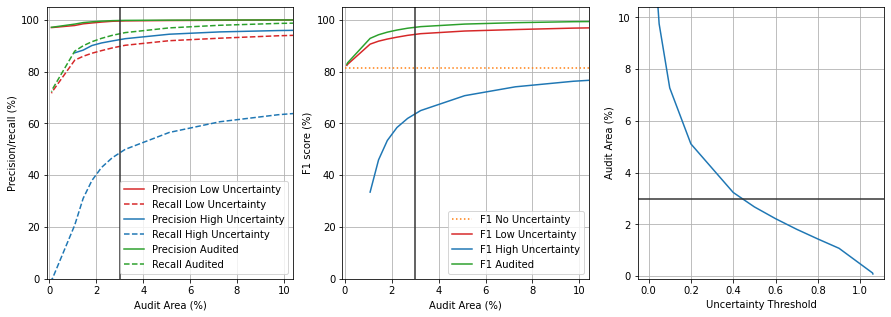

In [184]:
'''
xlim = [-0.3, 12.7]
xlim = [-0.1, 10.4]

ylim = [0, 105]
'''
trainer.plotUncertaintyAA()

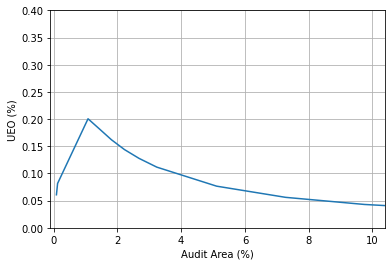

In [185]:
trainer.plotUEO()

In [186]:
trainer.getOptimalUncertaintyThreshold(bound = 0.0015)

ic| bounds: (0.0015, 1.0599757537841796)
c:\Users\jchamorro\Anaconda3\envs\tf2\lib\site-packages\scipy\optimize\_minimize.py:783: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  warn("Method 'bounded' does not support relative tolerance in x; "


0.4058017616778914
threshold 0.4058017616778914


ic| label_current_deforestation_test_classified_incorrect.shape: (1733461,)
    predicted_test_classified_incorrect.shape: (1733461,)
ic| TP_H + FN_H + FP_H + TN_H: 1733461
    len(label_mask_current_deforestation_test): 54181542
ic| TP_H + FN_H + FP_H + TN_H: 1733461
    len(label_mask_current_deforestation_test): 54181542


[0.99638929 0.90150986 0.45294164 0.03199357 0.92706468 0.49846457
 0.11253364]
0.6556739921062881
threshold 0.6556739921062881


ic| label_current_deforestation_test_classified_incorrect.shape: (1079300,)
    predicted_test_classified_incorrect.shape: (1079300,)
ic| TP_H + FN_H + FP_H + TN_H: 1079300
    len(label_mask_current_deforestation_test): 54181542
ic| TP_H + FN_H + FP_H + TN_H: 1079300
    len(label_mask_current_deforestation_test): 54181542


[0.98990923 0.87581612 0.5509863  0.01992007 0.90612614 0.40437674
 0.15347837]
0.2513722304283966
threshold 0.2513722304283966


ic| label_current_deforestation_test_classified_incorrect.shape: (2417516,)
    predicted_test_classified_incorrect.shape: (2417516,)
ic| TP_H + FN_H + FP_H + TN_H: 2417516
    len(label_mask_current_deforestation_test): 54181542
ic| TP_H + FN_H + FP_H + TN_H: 2417516
    len(label_mask_current_deforestation_test): 54181542


[0.99741423 0.91520036 0.38164747 0.04461881 0.94060134 0.54772335
 0.08602355]
0.4734102336194349
threshold 0.4734102336194349


ic| label_current_deforestation_test_classified_incorrect.shape: (1524570,)
    predicted_test_classified_incorrect.shape: (1524570,)
ic| TP_H + FN_H + FP_H + TN_H: 1524570
    len(label_mask_current_deforestation_test): 54181542
ic| TP_H + FN_H + FP_H + TN_H: 1524570
    len(label_mask_current_deforestation_test): 54181542


[0.9953235  0.89463311 0.48034274 0.02813818 0.9211032  0.47641908
 0.12347448]
0.4447819913692636
threshold 0.4447819913692636


ic| label_current_deforestation_test_classified_incorrect.shape: (1609274,)
    predicted_test_classified_incorrect.shape: (1609274,)
ic| TP_H + FN_H + FP_H + TN_H: 1609274
    len(label_mask_current_deforestation_test): 54181542
ic| TP_H + FN_H + FP_H + TN_H: 1609274
    len(label_mask_current_deforestation_test): 54181542


[0.99585732 0.89746054 0.46887342 0.02970152 0.92358101 0.48599895
 0.11880585]
0.44027755292970727
threshold 0.44027755292970727


ic| label_current_deforestation_test_classified_incorrect.shape: (1623008,)
    predicted_test_classified_incorrect.shape: (1623008,)
ic| TP_H + FN_H + FP_H + TN_H: 1623008
    len(label_mask_current_deforestation_test): 54181542
ic| TP_H + FN_H + FP_H + TN_H: 1623008
    len(label_mask_current_deforestation_test): 54181542


[0.99593257 0.89792428 0.46700799 0.029955   0.92398646 0.48750893
 0.11808671]
0.4271089724605599
threshold 0.4271089724605599


ic| label_current_deforestation_test_classified_incorrect.shape: (1664216,)
    predicted_test_classified_incorrect.shape: (1664216,)
ic| TP_H + FN_H + FP_H + TN_H: 1664216
    len(label_mask_current_deforestation_test): 54181542
ic| TP_H + FN_H + FP_H + TN_H: 1664216
    len(label_mask_current_deforestation_test): 54181542


[0.99614418 0.899375   0.46170594 0.03071555 0.9251156  0.49165795
 0.11598535]
0.43789087581225966
threshold 0.43789087581225966


ic| label_current_deforestation_test_classified_incorrect.shape: (1630443,)
    predicted_test_classified_incorrect.shape: (1630443,)
ic| TP_H + FN_H + FP_H + TN_H: 1630443
    len(label_mask_current_deforestation_test): 54181542
ic| TP_H + FN_H + FP_H + TN_H: 1630443
    len(label_mask_current_deforestation_test): 54181542


[0.99597556 0.89822663 0.46600373 0.03009222 0.92419842 0.48828585
 0.11771652]
0.4399805026543397
threshold 0.4399805026543397


ic| label_current_deforestation_test_classified_incorrect.shape: (1623915,)
    predicted_test_classified_incorrect.shape: (1623915,)
ic| TP_H + FN_H + FP_H + TN_H: 1623915
    len(label_mask_current_deforestation_test): 54181542
ic| TP_H + FN_H + FP_H + TN_H: 1623915
    len(label_mask_current_deforestation_test): 54181542


[0.99593432 0.89795945 0.46687841 0.02997174 0.92402042 0.48761162
 0.1180405 ]
0.43935571286393904
threshold 0.43935571286393904


ic| label_current_deforestation_test_classified_incorrect.shape: (1625892,)
    predicted_test_classified_incorrect.shape: (1625892,)
ic| TP_H + FN_H + FP_H + TN_H: 1625892
    len(label_mask_current_deforestation_test): 54181542
ic| TP_H + FN_H + FP_H + TN_H: 1625892
    len(label_mask_current_deforestation_test): 54181542


[0.99594632 0.8980254  0.46660844 0.03000823 0.92407671 0.48782969
 0.11793804]
0.4387961948981777
threshold 0.4387961948981777


ic| label_current_deforestation_test_classified_incorrect.shape: (1627571,)
    predicted_test_classified_incorrect.shape: (1627571,)
ic| TP_H + FN_H + FP_H + TN_H: 1627571
    len(label_mask_current_deforestation_test): 54181542
ic| TP_H + FN_H + FP_H + TN_H: 1627571
    len(label_mask_current_deforestation_test): 54181542


[0.99595557 0.8981055  0.46635063 0.03003922 0.92413415 0.48802765
 0.11785955]
0.4394509757537953
threshold 0.4394509757537953


ic| label_current_deforestation_test_classified_incorrect.shape: (1625594,)
    predicted_test_classified_incorrect.shape: (1625594,)
ic| TP_H + FN_H + FP_H + TN_H: 1625594
    len(label_mask_current_deforestation_test): 54181542
ic| TP_H + FN_H + FP_H + TN_H: 1625594
    len(label_mask_current_deforestation_test): 54181542


[0.99594672 0.89800642 0.46665434 0.03000273 0.92406296 0.4877972
 0.11795108]
0.4395735656340029
threshold 0.4395735656340029


ic| label_current_deforestation_test_classified_incorrect.shape: (1625190,)
    predicted_test_classified_incorrect.shape: (1625190,)
ic| TP_H + FN_H + FP_H + TN_H: 1625190
    len(label_mask_current_deforestation_test): 54181542
ic| TP_H + FN_H + FP_H + TN_H: 1625190
    len(label_mask_current_deforestation_test): 54181542


[0.99594149 0.89799475 0.46671373 0.02999527 0.92405501 0.48774757
 0.11797164]
0.4394882450888977
threshold 0.4394882450888977


ic| label_current_deforestation_test_classified_incorrect.shape: (1625462,)
    predicted_test_classified_incorrect.shape: (1625462,)
ic| TP_H + FN_H + FP_H + TN_H: 1625462
    len(label_mask_current_deforestation_test): 54181542
ic| TP_H + FN_H + FP_H + TN_H: 1625462
    len(label_mask_current_deforestation_test): 54181542


[0.99594686 0.8980026  0.46667054 0.03000029 0.92405811 0.48778404
 0.11795842]
0.43952158494089516
threshold 0.43952158494089516


ic| label_current_deforestation_test_classified_incorrect.shape: (1625352,)
    predicted_test_classified_incorrect.shape: (1625352,)
ic| TP_H + FN_H + FP_H + TN_H: 1625352
    len(label_mask_current_deforestation_test): 54181542
ic| TP_H + FN_H + FP_H + TN_H: 1625352
    len(label_mask_current_deforestation_test): 54181542
ic| self.threshold_optimal: 0.4394882450888977


[0.99594124 0.89800525 0.46668403 0.02999826 0.92406391 0.48776965
 0.11796486]


In [187]:
trainer.getUncertaintyMetricsFromOptimalThreshold()

threshold 0.4394882450888977


ic| label_current_deforestation_test_classified_incorrect.shape: (1625462,)
    predicted_test_classified_incorrect.shape: (1625462,)
ic| TP_H + FN_H + FP_H + TN_H: 1625462
    len(label_mask_current_deforestation_test): 54181542
ic| TP_H + FN_H + FP_H + TN_H: 1625462
    len(label_mask_current_deforestation_test): 54181542


[0.99594686 0.8980026  0.46667054 0.03000029 0.92405811 0.48778404
 0.11795842]
threshold 0.4394882450888977
(54181542,) (54181542,)


ic| self.m_optimal: {'AA': array([0.03000029]),
                     'UEO': array([0.11795842]),
                     'f1': 81.41,
                     'f1_H': array([0.63851444]),
                     'f1_L': array([0.94444217]),
                     'precision_H': array([0.92405811]),
                     'precision_L': array([0.99594686]),
                     'recall_H': array([0.48778404]),
                     'recall_L': array([0.8980026]),
                     'recall_Ltotal': array([0.46667054])}
ic| self.m_audited_optimal: {'f1': array([0.97182771]),
                             'precision': array([0.99799853]),
                             'recall': array([0.94699438])}


cm_audited [[53439289     1407]
 [   39269   701577]]
[0.99799853 0.94699438]


{'metrics': {'precision_L': array([0.99594686]),
  'recall_L': array([0.8980026]),
  'recall_Ltotal': array([0.46667054]),
  'AA': array([0.03000029]),
  'precision_H': array([0.92405811]),
  'recall_H': array([0.48778404]),
  'UEO': array([0.11795842]),
  'f1_L': array([0.94444217]),
  'f1_H': array([0.63851444]),
  'f1': 81.41},
 'metrics_audited': {'precision': array([0.99799853]),
  'recall': array([0.94699438]),
  'f1': array([0.97182771])},
 'exp': 123}